In [23]:
import pyodbc
import pandas as pd 

In [24]:
server = '<SERVER>' 
database = 'AdventureWorksDW2017' 
username = '<USUARIO>' 
password = '<PWD>' 

#Abrimos la conexion
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)

In [25]:
consulta = "Consulta SQL AdventureWorksDW17.sql"


fichero = open(consulta , "r")
consultaRFM = fichero.read()
fichero.close()

In [26]:
df_RFM = pd.read_sql(consultaRFM,cnxn)
df_RFM.head()

C:\Users\anton\AppData\Local\Temp\ipykernel_10724\2835635214.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_RFM = pd.read_sql(consultaRFM,cnxn)


,CustomerKey,rfm_recency,rfm_frequency,rfm_monetary,rfm_Score_Classic,rfm_Score_New,rfm_Score_Concat,rfm_avg
0,14324,2,4,2,16,53,242,3.0
1,18569,1,1,1,1,20,111,1.0
2,27059,1,4,1,4,40,141,2.0
3,22814,1,1,1,1,20,111,1.0
4,15652,2,4,2,16,53,242,3.0


In [27]:
ficheroconsultaClientes= "ConsultaSQL Clientes AdventureWorksDW2017.sql"
fichero = open(ficheroconsultaClientes , "r")
consultaClientes = fichero.read()
fichero.close()
df_clientes = pd.read_sql(consultaClientes, cnxn)
df_clientes.head()

C:\Users\anton\AppData\Local\Temp\ipykernel_10724\2688477819.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_clientes = pd.read_sql(consultaClientes, cnxn)


,CustomerKey,Edad,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,SpanishEducation,SpanishOccupation,HouseOwnerFlag,NumberCarsOwned,MesesPrimeraCompra,CommuteDistance
0,11000,43,M,M,90000.0,2,0,Licenciatura,Profesional,1,0,37,1-2 Miles
1,11001,38,S,M,60000.0,3,3,Licenciatura,Profesional,0,1,37,0-1 Miles
2,11002,43,M,M,60000.0,3,3,Licenciatura,Profesional,1,1,37,2-5 Miles
3,11003,41,S,F,70000.0,0,0,Licenciatura,Profesional,0,1,38,5-10 Miles
4,11004,35,S,F,80000.0,5,5,Licenciatura,Profesional,1,4,37,1-2 Miles


In [28]:
df_input = pd.merge(df_RFM , df_clientes, on="CustomerKey")
df_input.head()

,CustomerKey,rfm_recency,rfm_frequency,rfm_monetary,rfm_Score_Classic,rfm_Score_New,rfm_Score_Concat,rfm_avg,Edad,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,SpanishEducation,SpanishOccupation,HouseOwnerFlag,NumberCarsOwned,MesesPrimeraCompra,CommuteDistance
0,14324,2,4,2,16,53,242,3.0,52,S,F,70000.0,1,0,Estudios universitarios (en curso),Obrero especializado,1,1,17,5-10 Miles
1,18569,1,1,1,1,20,111,1.0,43,M,F,60000.0,0,0,Estudios de postgrado,Profesional,1,0,12,0-1 Miles
2,27059,1,4,1,4,40,141,2.0,31,M,M,50000.0,0,0,Estudios de postgrado,Obrero especializado,0,0,12,0-1 Miles
3,22814,1,1,1,1,20,111,1.0,63,M,M,100000.0,2,3,Licenciatura,Gestión,1,4,11,10+ Miles
4,15652,2,4,2,16,53,242,3.0,48,M,F,30000.0,4,0,Estudios de postgrado,Administrativo,1,0,27,0-1 Miles


In [29]:
# Quitar columnas que no nos interesan y el CustomerKey como indice
caracteristicas = ['Edad','rfm_recency','rfm_frequency' , 'rfm_monetary' ,'TotalChildren','NumberChildrenAtHome' , 'NumberCarsOwned' , 'MesesPrimeraCompra','MaritalStatus', 'Gender', 'SpanishEducation','SpanishOccupation','CommuteDistance' ]

df_input.set_index('CustomerKey',inplace=True)
df_input = df_input[caracteristicas]



In [30]:
df_input.head()

,Edad,rfm_recency,rfm_frequency,rfm_monetary,TotalChildren,NumberChildrenAtHome,NumberCarsOwned,MesesPrimeraCompra,MaritalStatus,Gender,SpanishEducation,SpanishOccupation,CommuteDistance
CustomerKey,,,,,,,,,,,,,
14324,52,2,4,2,1,0,1,17,S,F,Estudios universitarios (en curso),Obrero especializado,5-10 Miles
18569,43,1,1,1,0,0,0,12,M,F,Estudios de postgrado,Profesional,0-1 Miles
27059,31,1,4,1,0,0,0,12,M,M,Estudios de postgrado,Obrero especializado,0-1 Miles
22814,63,1,1,1,2,3,4,11,M,M,Licenciatura,Gestión,10+ Miles
15652,48,2,4,2,4,0,0,27,M,F,Estudios de postgrado,Administrativo,0-1 Miles


In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [32]:
#Vamos a definir un Pipeline que nos permita realizar las tareas de limpieza y transformación sobre varias columnas

#Seleccionamos las columnas numéricas
numeric_features = ['Edad','rfm_recency','rfm_frequency' , 'rfm_monetary' ,'TotalChildren','NumberChildrenAtHome' , 'NumberCarsOwned' , 'MesesPrimeraCompra' ]
#Definimos las transformaciones que les vamos a aplicar --> Imputar nulos y escalar
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#Definimos las variables categóricas y las transformaciones --> Imputar con 'missing' y aplicar una Codificación OneHot

categorical_features = ['MaritalStatus', 'Gender', 'SpanishEducation','SpanishOccupation','CommuteDistance']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#Utilizamos el método ColumnTransformer para asociar los pipelines a las columnas

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [35]:
from sklearn.cluster import KMeans
import sklearn.metrics as sm
model = KMeans(n_clusters=4)


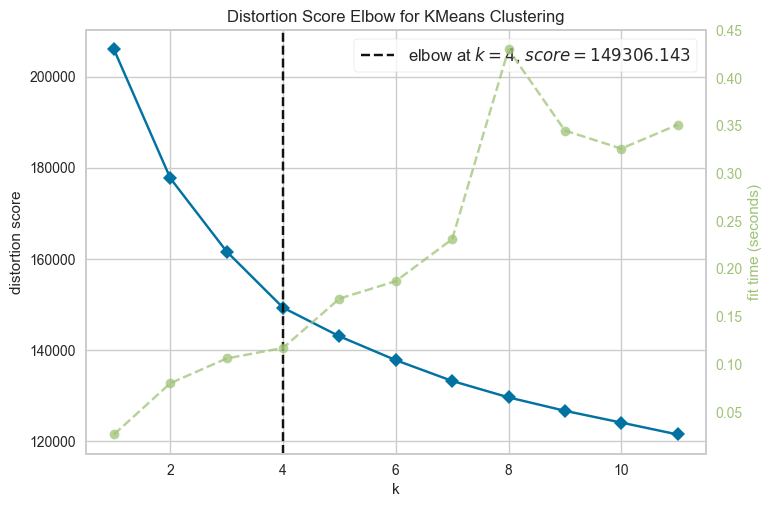

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:

from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model, k=(1,12))

visorcluster = Pipeline(steps=[('preprocessor', preprocessor),
                      ('segmentador', visualizer)])

visorcluster.fit(df_input)     # Entrenamos con los datos

visualizer.show()        # Renderizamos la imagen

In [36]:
cluster = Pipeline(steps=[('preprocessor', preprocessor),
                      ('segmentador', model)])

In [37]:
cluster.fit(df_input)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Edad', 'rfm_recency',
                                                   'rfm_frequency',
                                                   'rfm_monetary',
                                                   'TotalChildren',
                                                   'NumberChildrenAtHome',
                                                   'NumberCarsOwned',
                                                   'MesesPrimeraCompra']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MaritalStatus', 'Gender',
                                                   'SpanishEducation',
                                                   'SpanishOccupation',
                                                   'CommuteDistance'])])),
                ('segmentador', KMeans(n_clusters=4))])

In [38]:
df_input['cluster'] = model.labels_

In [39]:
df_input.head()

,Edad,rfm_recency,rfm_frequency,rfm_monetary,TotalChildren,NumberChildrenAtHome,NumberCarsOwned,MesesPrimeraCompra,MaritalStatus,Gender,SpanishEducation,SpanishOccupation,CommuteDistance,cluster
CustomerKey,,,,,,,,,,,,,,
14324,52,2,4,2,1,0,1,17,S,F,Estudios universitarios (en curso),Obrero especializado,5-10 Miles,0
18569,43,1,1,1,0,0,0,12,M,F,Estudios de postgrado,Profesional,0-1 Miles,1
27059,31,1,4,1,0,0,0,12,M,M,Estudios de postgrado,Obrero especializado,0-1 Miles,1
22814,63,1,1,1,2,3,4,11,M,M,Licenciatura,Gestión,10+ Miles,2
15652,48,2,4,2,4,0,0,27,M,F,Estudios de postgrado,Administrativo,0-1 Miles,0


In [40]:
# Agrupamos los clientes por clusters y vemos el valor medio de cada variable para es cluster

df_segm_analysis = df_input.groupby(['cluster']).mean()
df_segm_analysis

C:\Users\anton\AppData\Local\Temp\ipykernel_10724\1449284788.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_segm_analysis = df_input.groupby(['cluster']).mean()


,Edad,rfm_recency,rfm_frequency,rfm_monetary,TotalChildren,NumberChildrenAtHome,NumberCarsOwned,MesesPrimeraCompra
cluster,,,,,,,,
0,42.559129,1.603297,3.151231,2.078364,1.341950,0.501527,1.017301,22.035213
1,37.431417,1.905092,2.592830,1.265501,0.609110,0.299446,1.087288,6.641496
2,44.600896,1.910448,2.948657,1.348358,3.326567,3.713134,2.694030,10.193134
3,59.622260,1.852325,2.534570,1.239460,2.984341,0.432185,1.716454,7.470007


Text(0.5, 1.0, 'K Mean Classification')

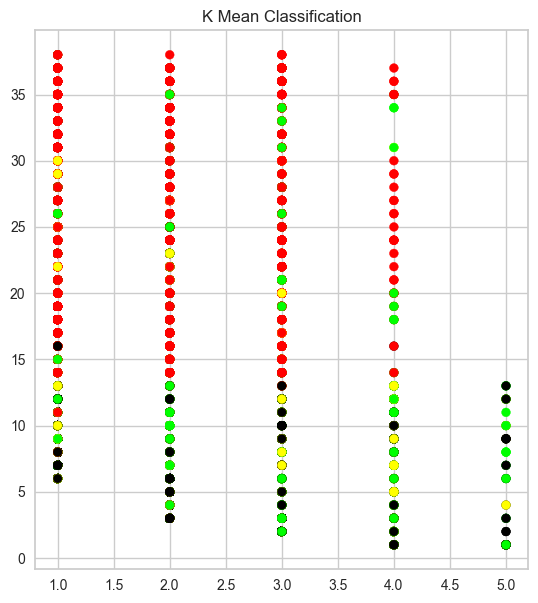

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14,7))
 
# Crear colormap
colormap = np.array(['red', 'lime', 'black','yellow'])

# Plot de las clasificaciones del modelo
plt.subplot(1, 2, 2)
plt.scatter(df_input.rfm_recency, df_input.MesesPrimeraCompra, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')

In [20]:
model.inertia_

149306.1492360983

In [21]:
from sklearn.metrics.pairwise import euclidean_distances
dists = euclidean_distances(model.cluster_centers_)

import numpy as np
tri_dists = dists[np.triu_indices(4, 1)]
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()
max_dist

3.469635065796538

In [67]:
#Para cada característica de entrada. Para poder mostrarlos en 2D podemos utilizar PCA
model.cluster_centers_

array([[-0.05181865,  0.10598457,  0.13575251, -0.26548682,  0.91355952,
         1.76430193,  1.03830271, -0.16565997,  0.62850328,  0.37149672,
         0.4895647 ,  0.5104353 ,  0.19320215,  0.07751938,  0.07722123,
         0.2954681 ,  0.35658915,  0.05515802,  0.28950507,  0.05545617,
         0.13685152,  0.46302922,  0.33303518,  0.07453787,  0.24985092,
         0.16040549,  0.18217054],
       [-0.67090005,  0.10190173, -0.18145136, -0.41844251, -0.76734151,
        -0.4672252 , -0.3673129 , -0.56899661,  0.44598578,  0.55401422,
         0.48621467,  0.51378533,  0.16837177,  0.0893012 ,  0.18779261,
         0.30275707,  0.25177735,  0.17392058,  0.03797468,  0.22438009,
         0.34610716,  0.21761748,  0.39067106,  0.19195422,  0.0461245 ,
         0.19941044,  0.17183978],
       [-0.2349696 , -0.22492741,  0.31484623,  1.05869674, -0.31721442,
        -0.33372349, -0.43315997,  1.17767934,  0.49378945,  0.50621055,
         0.50743229,  0.49256771,  0.12828345,  0.0409